dict_keys(['version', 'enabled', 'capillary', 'fishContour', 'fishEye', 'fishOrientation', 'centralDarkLine', 'bladder', 'notochord', 'otolith', 'yolk', 'pericard', 'pigmentation'])


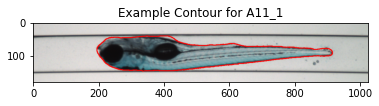

In [1]:
import json
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

with open('data/jsons/A11_1.json','r') as jf:
    data = json.load(jf)
print(data.keys())

im = cv.imread('data/A11_1.tiff')
contour = np.array(list(zip(data['fishContour']['shape'][1]['x'],data['fishContour']['shape'][1]['y'])))
cv.drawContours(im, [contour.astype(int)], 0, (255,0,0), 2)

plt.imshow(im)
plt.title('Example Contour for A11_1')
plt.show()

Mean error in %: 0.7945451296708443
Mean error : 1180446.4029739564


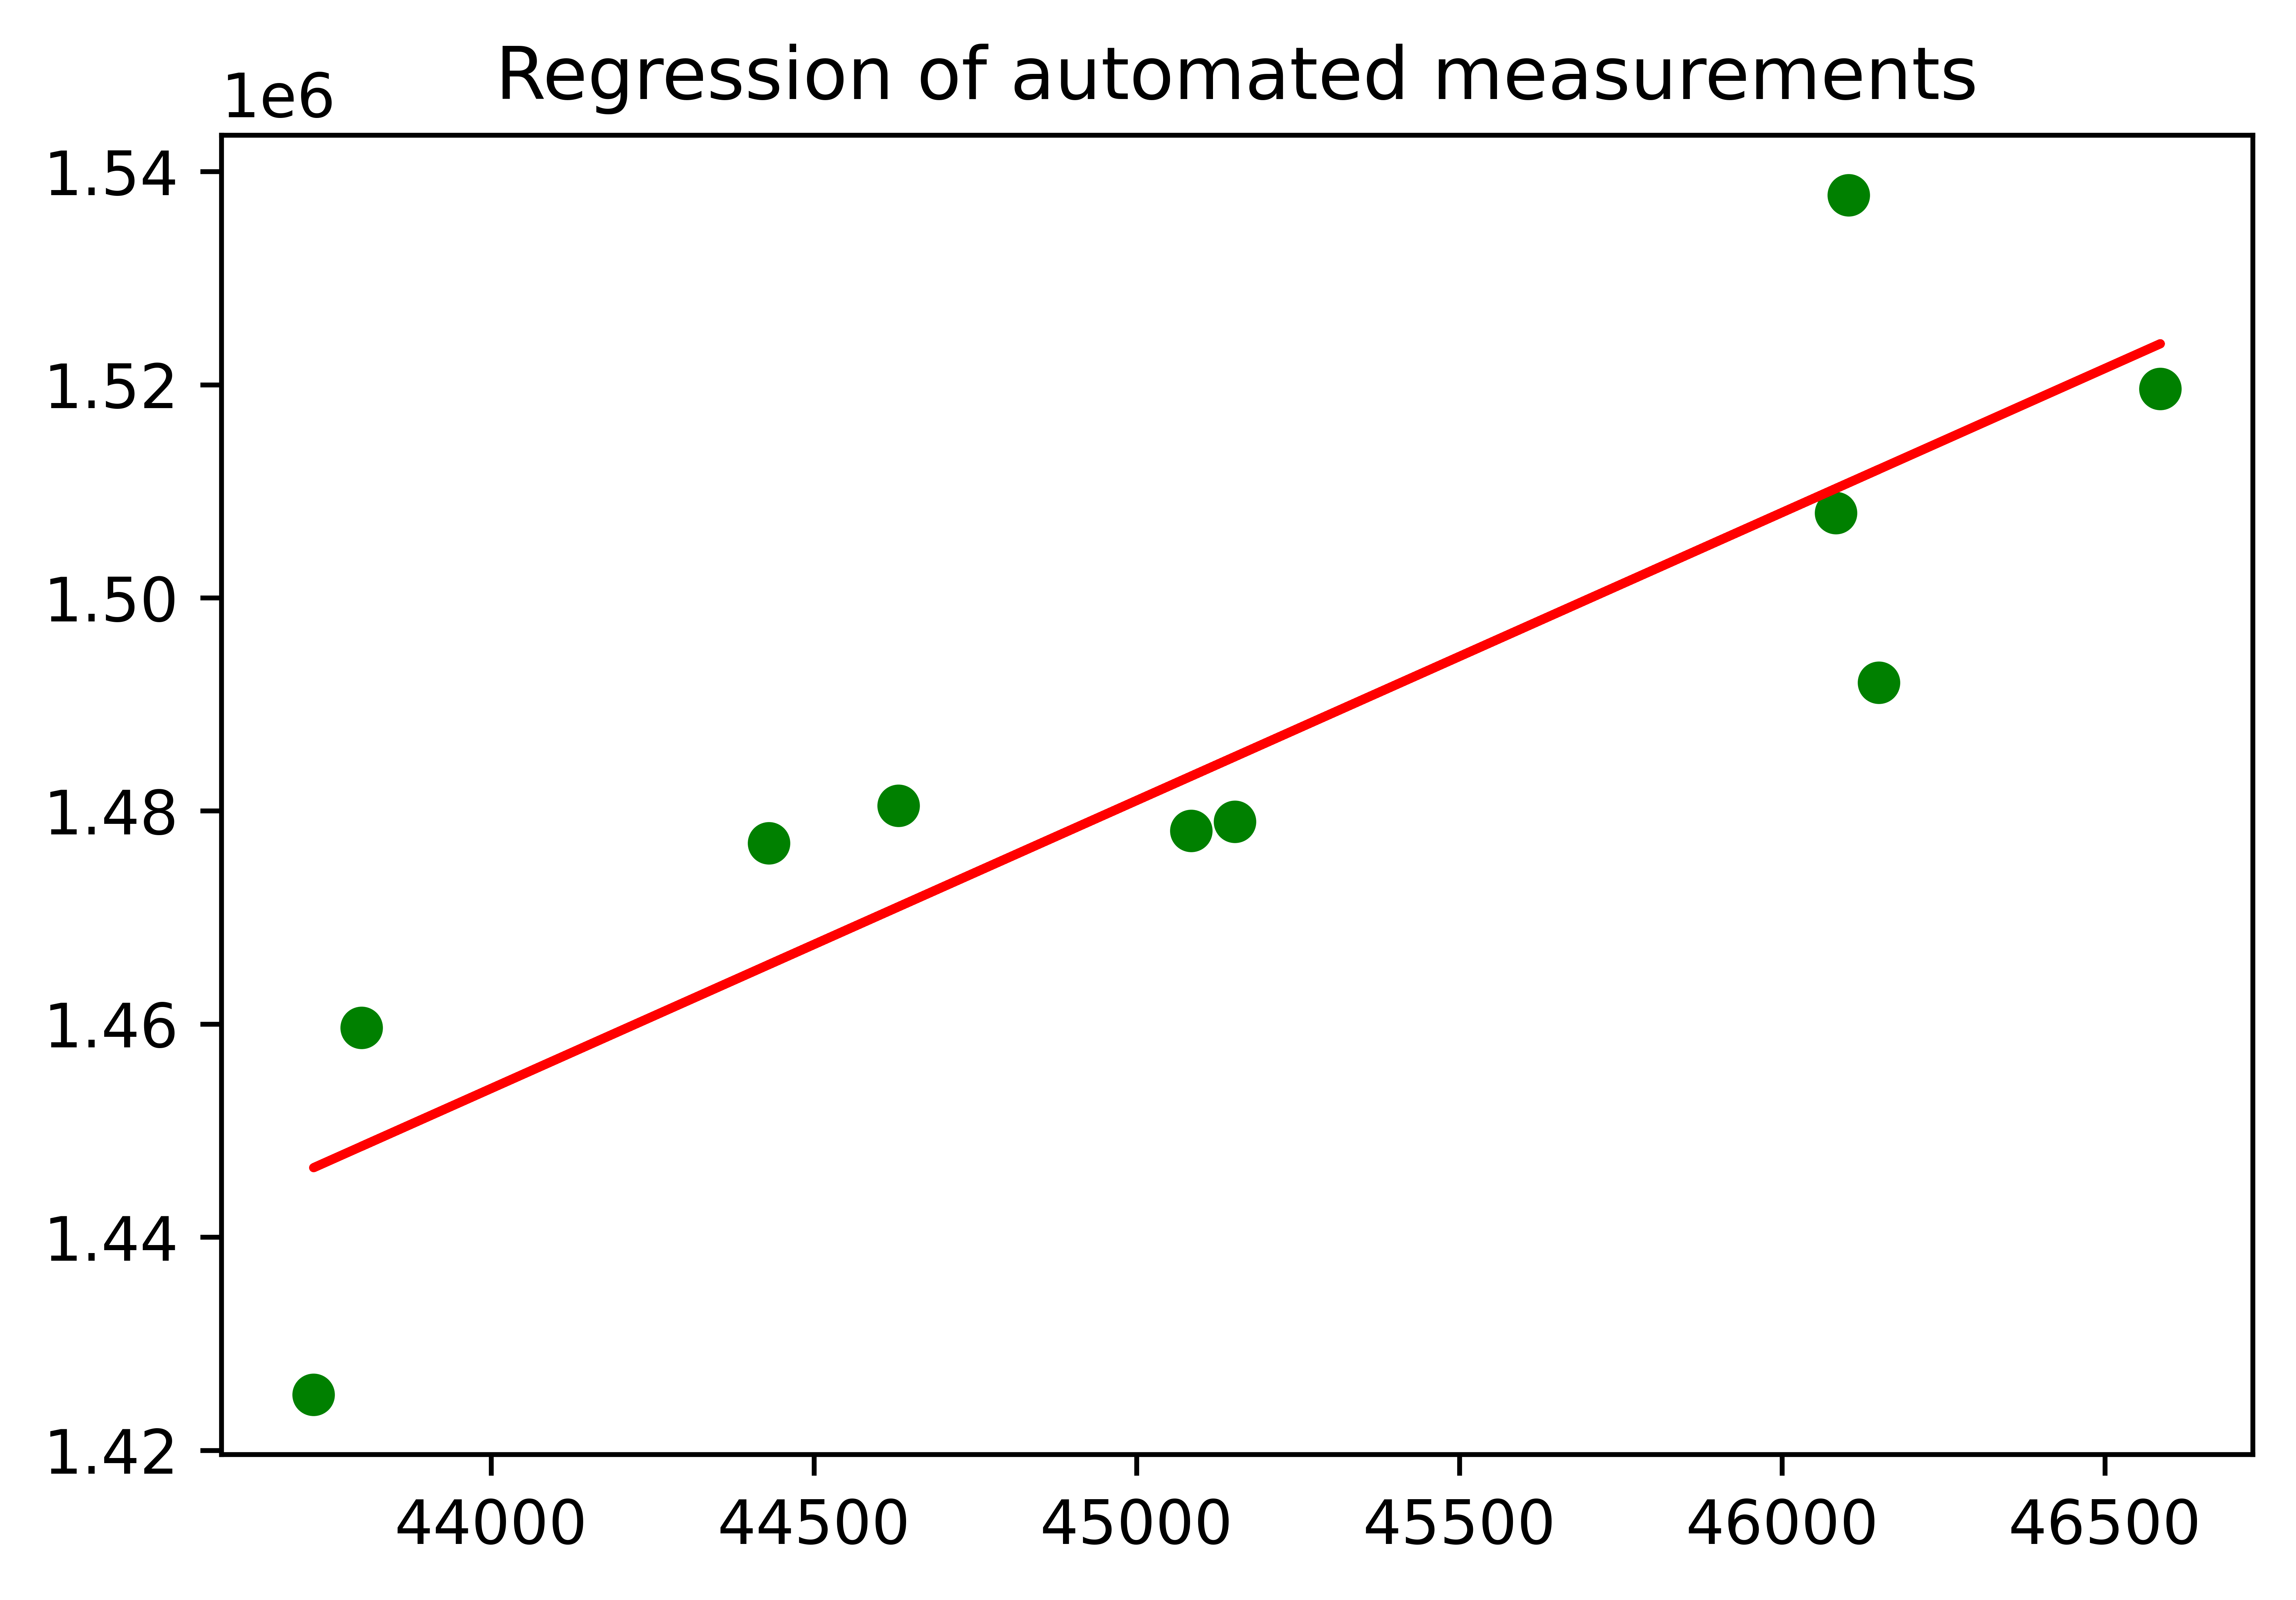

In [2]:
from os import walk
import cv2 as cv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('data/measurements.csv')
X = []
y = df['whole_body_area']
for id in df['id']:
    if not pd.isna(id):
        with open('data/jsons/'+str(id).replace('/',"_")+".json",'r') as jf:
            data = json.load(jf)
        contour = np.array(list(zip(data['fishContour']['shape'][1]['x'],data['fishContour']['shape'][1]['y'])))
        X.append(cv.contourArea(contour.astype(np.float32)))
X = np.array(X).reshape(-1, 1)
y = y
plt.figure(dpi=1200)
model = LinearRegression()
model.fit(X,y)
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='r')
plt.title('Regression of automated measurements')
print("Mean error in %: " + str(100*(mean_absolute_error(model.predict(X),y)/y.mean())))
print("Mean error : " + str(100*(mean_absolute_error(model.predict(X),y))))

In [3]:
from scipy.stats import pearsonr
corr, pval = pearsonr(X[:,0],y)
corr

0.88023330228947

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a58a938-337b-47a5-968c-fb43b9ad0e62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>